In [1]:
# Import needed libraries and tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix

In [2]:
candidates=pd.read_csv("Data_CSV/Explored_data.csv")

In [3]:
# Splitting categorical and numerical features
categorical_features = ["gender", "education_level", "major_discipline", "company_size", "company_type", "last_new_job"]
numerical_features=["city_development_index","experience","training_hours"]

In [4]:
# Gender Diversity Analysis
gender_distribution = candidates['gender'].value_counts(normalize=True) * 100

# Education Level Analysis
education_distribution = candidates['education_level'].value_counts(normalize=True) * 100

# Experience Analysis
experience_summary = candidates['experience'].describe()

# Print the three analyses side by side
print(f"{'Gender Distribution':<30}{'Education Level Distribution':<35}{'Experience Summary':<35}")
print('-' * 100)
for gender, education, experience in zip(gender_distribution.items(), education_distribution.items(), experience_summary.items()):
    print(f"{gender[0]:<30}{education[0]:<35}{experience[0]:<35}")
    print(f"{gender[1]:<30.2f}{education[1]:<35.2f}{experience[1]:<35}")

Gender Distribution           Education Level Distribution       Experience Summary                 
----------------------------------------------------------------------------------------------------
Male                          Bachelor                           count                              
72.56                         64.17                              441.0                              
prefer not to say             Masters                            mean                               
19.95                         30.16                              16.471655328798185                 
Female                        Phd                                std                                
6.35                          3.85                               3.736154954571361                  
Other                         Not provided                       min                                
1.13                          1.13                               11.0                      

<span style="font-size: 20px; color: #5066aa; font-weight:bold;">Notes: This table shows the following analysis:
<ul style="color:darkgray">
<li><b>Gender diversity analysis</b> </li>
<li><b>Education level distribution</b></li>
<li><b>Experience summary</b></li>
</ul>
 </span>

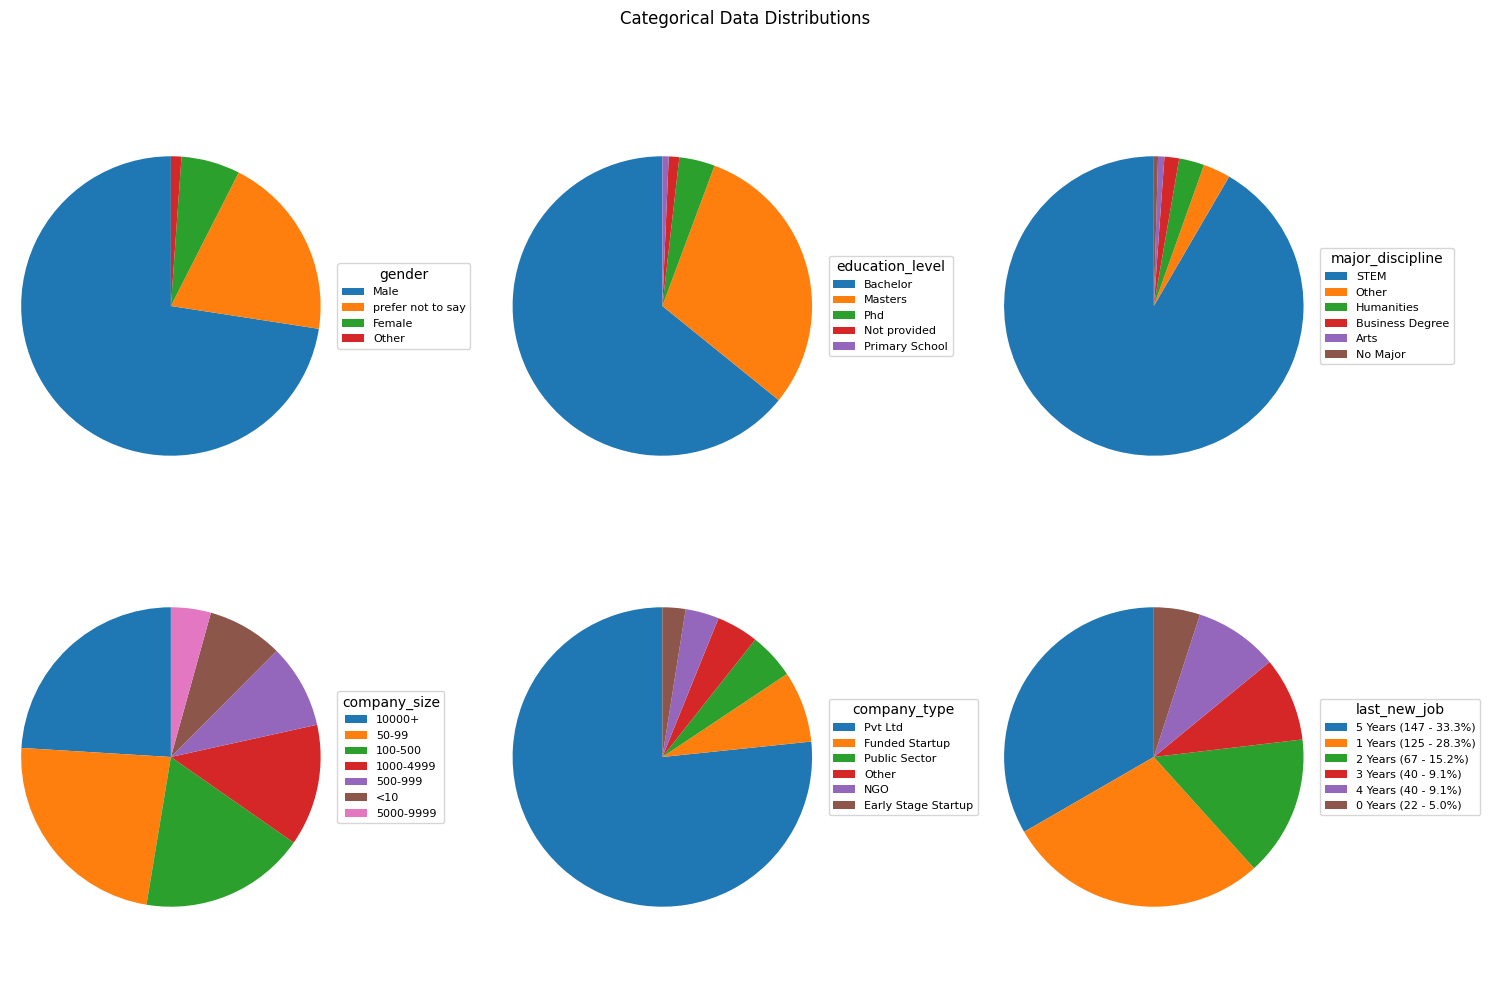

In [5]:
# SubPlots show the distribution of each categorical data
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Categorical Data Distributions")

# Loop through categorical features and create pie charts
for i, feature in enumerate(categorical_features):
    ax = axes[i // 3, i % 3]
    counts = candidates[feature].value_counts()
    
    # Customize legend "last_new_job" feature
    if feature == "last_new_job":
        legend_labels = [f"{label} Years ({count} - {percentage:.1f}%)"
                         for label, count, percentage in zip(counts.index, counts, counts / counts.sum() * 100)]
    else:
        legend_labels = counts.index

    wedges, texts, autotexts = ax.pie(counts, labels=None, autopct='', startangle=90)
    ax.legend(wedges, legend_labels, title=feature, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=8)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    ax.set_title("")

# Adjust subplot layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()

<span style="font-size: 20px; color: #5066aa; font-weight:bold;">Notes: These pie charts show the distribution of categorical data with percentage. </span>

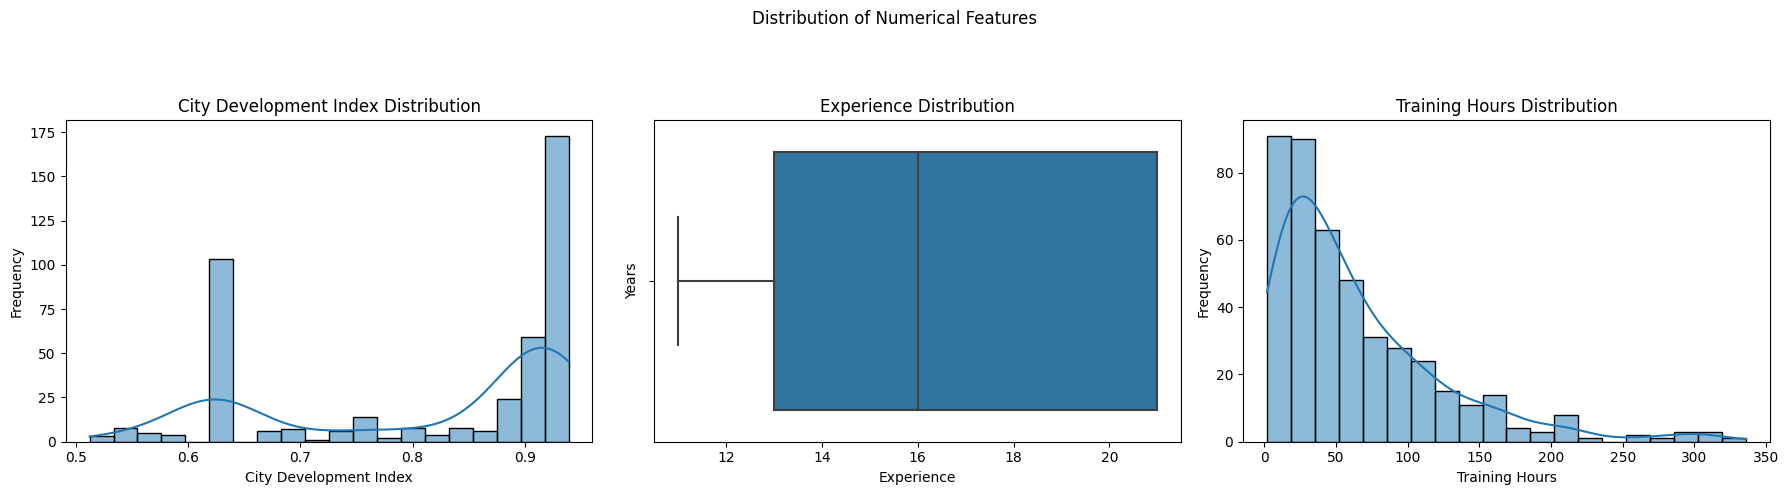

In [6]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Distribution of Numerical Features")

# Plot 1: Distribution plot for city_development_index
sns.histplot(candidates["city_development_index"], bins=20, kde=True, ax=axes[0])
axes[0].set_xlabel("City Development Index")
axes[0].set_ylabel("Frequency")
axes[0].set_title("City Development Index Distribution")

# Plot 2: Box plot for experience
sns.boxplot(x="experience", data=candidates, ax=axes[1])
axes[1].set_xlabel("Experience")
axes[1].set_ylabel("Years")
axes[1].set_title("Experience Distribution")

# Plot 3: Distribution plot for training_hours
sns.histplot(candidates["training_hours"], bins=20, kde=True, ax=axes[2])
axes[2].set_xlabel("Training Hours")
axes[2].set_ylabel("Frequency")
axes[2].set_title("Training Hours Distribution")

# Adjust subplot layout
plt.tight_layout(rect=[0, 0, 1, 0.9])

# Show the plots
plt.show()

<span style="font-size: 20px; color: #5066aa; font-weight:bold;">Notes: In aspect of numerical features these figures shows that: 
<ul style="color:darkgray">
<li><b>City Development: </b>Candidates city development concentrates in the value of "0.62" and "0.93"</li>
<li><b>Experience: </b>Experience normally distributed, and the average experience is "16".</li>
<li><b>Training hours: </b>Big skewness to the right, because there is some candidates are over-qualified.</li>
</ul>
</span>

In [7]:
# Interactive scatter plot for candidates gender of how much training hours they have and their city development index 
fig = px.scatter(
    candidates, # data
    x='city_development_index', # x-axis
    y='training_hours', # y-axis
    color='gender', # color hue based on given feature
    title='City Development vs. Training Hours', # title of the fig
    labels={'city_development_index': 'City Development', 'training_hours': 'Training Hours'}, # labeling the data
    hover_name='enrollee_id' # show the candidate ID on hover
)

fig.update_traces(visible='legendonly') # This will reset the figure without scatter , to let the user view bu pressing on the feature he wants

# Adjust the layout 
fig.update_layout(
    autosize=False,
    width=800,
    height=400,
)

fig.show()

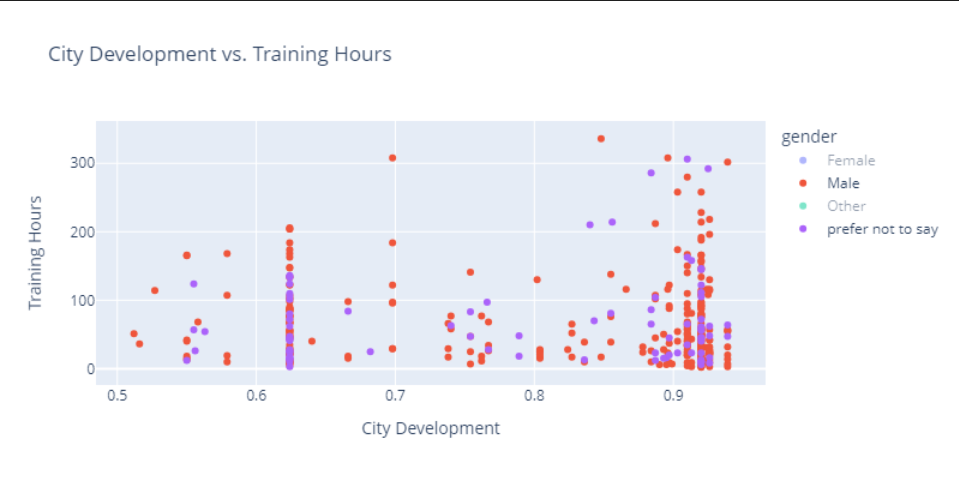

<span style="font-size: 20px; color: #5066aa; font-weight:bold;">Notes: This interactive figure show that: 
<ul style="color:darkgray">
<li><b>Males : </b>Are the majority and it concentrated in "0.62" and "0.91-0.926"</li>
<li><b>Females: </b>Concentrated in "0.92"</li>
<li><b>Other gender: </b>Concentrated in "0.92"</li> # Here we can deal with others as females (in this aspect)
<li><b>People that prefer not to say: </b>Concentrated in "0.62" and "0.92"</li>  # Here we can deal with others as males (in this aspect)
</ul>
</span>

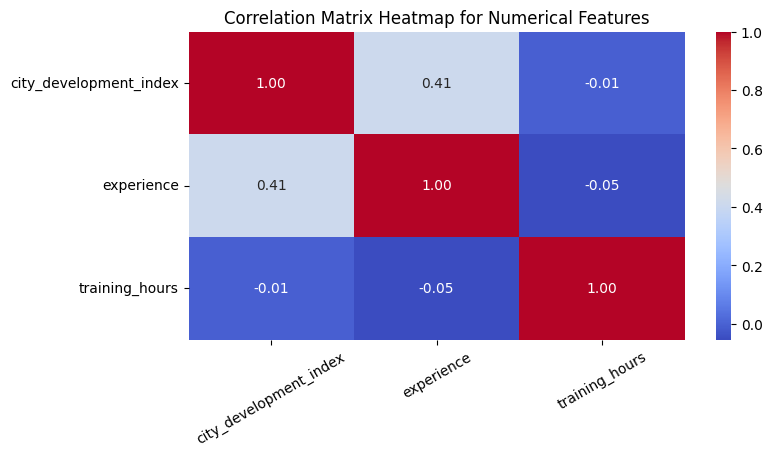

In [8]:
# Select only the numerical columns for correlation analysis
numerical_data = candidates[numerical_features]

# Calculate the correlation matrix for numerical features
correlation_matrix = numerical_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap for Numerical Features')
plt.xticks(rotation=30)
plt.show()

<span style="font-size: 20px; color: #5066aa; font-weight:bold;">Notes: We conclude that the correlations between numerical data are 
 <span style="color: brown">Weak.</span>
</span>

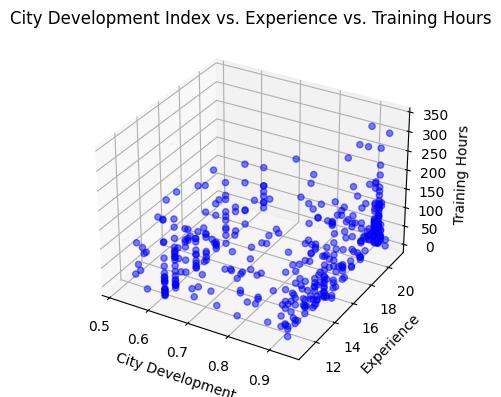

In [9]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(222, projection='3d')

# Extract the three continuous variables
x = candidates['city_development_index']
y = candidates['experience']
z = candidates['training_hours']

# Create the scatter plot
ax.scatter(x, y, z, c='b', marker='o', alpha=0.5)

# Set labels for the axes
ax.set_xlabel('City Development')
ax.set_ylabel('Experience')
ax.set_zlabel('Training Hours')

# Set the title
ax.set_title('City Development Index vs. Experience vs. Training Hours')

plt.show()

<span style="font-size: 20px; color: #5066aa; font-weight:bold;">Notes: using this 3D figure we can conclude :
<ol style="color:darkgray">
<li><b>Outliers </b> </li>
<li><b>Clusters or Patterns</b></li>
<li><b>Noisy Data</b></li>
<li><b>3D comparison</b></li>
</ol>

</span>